In [ ]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
#load dataset after preprocessing
dna = pd.read_csv('d.csv')

Epoch 1/100
7/7 [==============================] - 9s 255ms/step - loss: 0.6736 - accuracy: 0.6172 - val_loss: 0.6499 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6511 - accuracy: 0.6288 - val_loss: 0.6450 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 44ms/step - loss: 0.6425 - accuracy: 0.6288 - val_loss: 0.6293 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 43ms/step - loss: 0.6207 - accuracy: 0.6288 - val_loss: 0.5979 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 43ms/step - loss: 0.5823 - accuracy: 0.6288 - val_loss: 0.5414 - val_accuracy: 0.7315
Epoch 6/100
7/7 [==============================] - 0s 43ms/step - loss: 0.4792 - accuracy: 0.7680 - val_loss: 0.4443 - val_accuracy: 0.8704
Epoch 7/100
7/7 [==============================] - 0s 40ms/step - loss: 0.3305 - accuracy: 0.9002 - val_loss: 0.3369 - val_accuracy: 0.8611
Epoch 8/100
7/7 [==

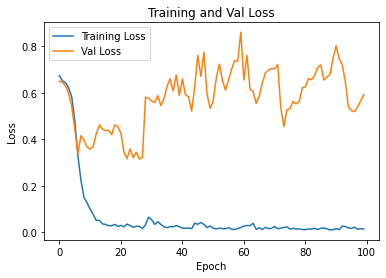

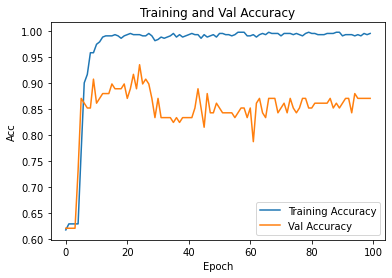

In [9]:
#Model Sentiment with NLTK stopword and Nazief Adriani Stemmer
texts = dna['Ulasan'].astype(str)
labels = dna['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model = Sequential()
model.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Bidirectional(LSTM(units = 64)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [10]:
model.save('n_as.h5')

Epoch 1/100
7/7 [==============================] - 7s 242ms/step - loss: 0.6783 - accuracy: 0.6241 - val_loss: 0.6477 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6454 - accuracy: 0.6288 - val_loss: 0.6433 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6428 - accuracy: 0.6288 - val_loss: 0.6263 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6189 - accuracy: 0.6288 - val_loss: 0.5949 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.5681 - accuracy: 0.6357 - val_loss: 0.5161 - val_accuracy: 0.7685
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.4291 - accuracy: 0.8144 - val_loss: 0.3964 - val_accuracy: 0.8796
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.3028 - accuracy: 0.9142 - val_loss: 0.3834 - val_accuracy: 0.8426
Epoch 8/100
7/7 [==

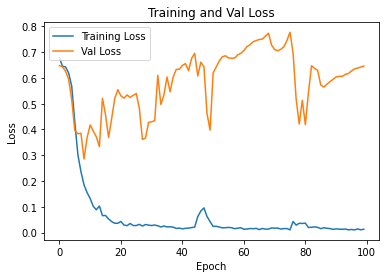

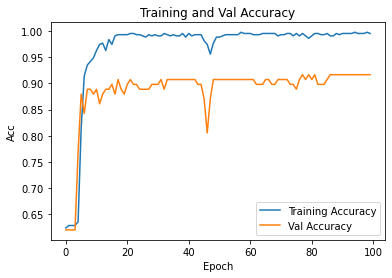

In [11]:
#Model Sentiment with NLTK stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dns['Ulasan'].astype(str)
labels = dns['Label']

#Tokenizer and Pad Sequence
dns_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dns_token.fit_on_texts(texts)
X = dns_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model1 = Sequential()
model1.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model1.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model1.add(Dropout(0.6))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Bidirectional(LSTM(units = 64)))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model1.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [19]:
model1.save('n_sn.h5')

Epoch 1/100
7/7 [==============================] - 7s 257ms/step - loss: 0.6794 - accuracy: 0.6125 - val_loss: 0.6637 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6513 - accuracy: 0.6288 - val_loss: 0.6391 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6438 - accuracy: 0.6288 - val_loss: 0.6347 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6236 - accuracy: 0.6288 - val_loss: 0.6075 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6075 - accuracy: 0.6288 - val_loss: 0.5812 - val_accuracy: 0.6204
Epoch 6/100
7/7 [==============================] - 0s 36ms/step - loss: 0.5617 - accuracy: 0.6288 - val_loss: 0.5175 - val_accuracy: 0.6204
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.4808 - accuracy: 0.7193 - val_loss: 0.4079 - val_accuracy: 0.8148
Epoch 8/100
7/7 [==

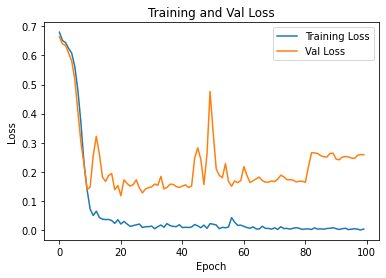

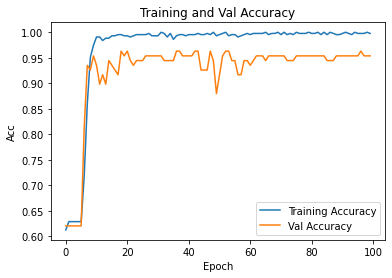

In [13]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Label']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [18]:
model2.save('s_an.h5')

Epoch 1/100
7/7 [==============================] - 7s 241ms/step - loss: 0.6766 - accuracy: 0.6148 - val_loss: 0.6479 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6801 - accuracy: 0.6288 - val_loss: 0.6530 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 40ms/step - loss: 0.6544 - accuracy: 0.6288 - val_loss: 0.6571 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6481 - accuracy: 0.6288 - val_loss: 0.6362 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6191 - accuracy: 0.6288 - val_loss: 0.6124 - val_accuracy: 0.6204
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6000 - accuracy: 0.6288 - val_loss: 0.5724 - val_accuracy: 0.6204
Epoch 7/100
7/7 [==============================] - 0s 40ms/step - loss: 0.5356 - accuracy: 0.6357 - val_loss: 0.4728 - val_accuracy: 0.7037
Epoch 8/100
7/7 [==

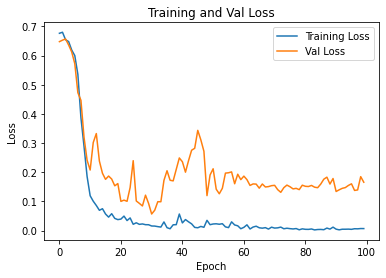

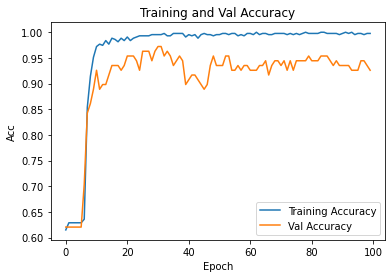

In [16]:
#Model Sentiment with Sastrawi stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dss['Ulasan']
labels = dss['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model3 = Sequential()
model3.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model3.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model3.add(Dropout(0.6))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Bidirectional(LSTM(units = 64)))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model3.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [17]:
model3.save('s_sn.h5')